In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf


In [2]:
# we download daily price data from yahoo finance
# we use the adjusted close price

# we download the data for the following tickers
# we use the following tickers SPY

import yfinance as yf

# we download the data for the following tickers: SPY

spy = yf.Ticker("SPY")
spy_df = spy.history(period="max")
spy_df = spy_df.reset_index()
spy_df = spy_df[["Date", "Close"]]

spy_df.head()




Date      Close
0 1993-01-29 00:00:00-05:00  24.840693
1 1993-02-01 00:00:00-05:00  25.017368
2 1993-02-02 00:00:00-05:00  25.070358
3 1993-02-03 00:00:00-05:00  25.335369
4 1993-02-04 00:00:00-05:00  25.441374

In [3]:
spy_df.tail()

Date       Close
7794 2024-01-12 00:00:00-05:00  476.679993
7795 2024-01-16 00:00:00-05:00  474.929993
7796 2024-01-17 00:00:00-05:00  472.290009
7797 2024-01-18 00:00:00-05:00  476.489990
7798 2024-01-19 00:00:00-05:00  482.059998

In [4]:
len(spy_df)

7799

<Axes: title={'center': 'SPY Price'}, xlabel='Date'>

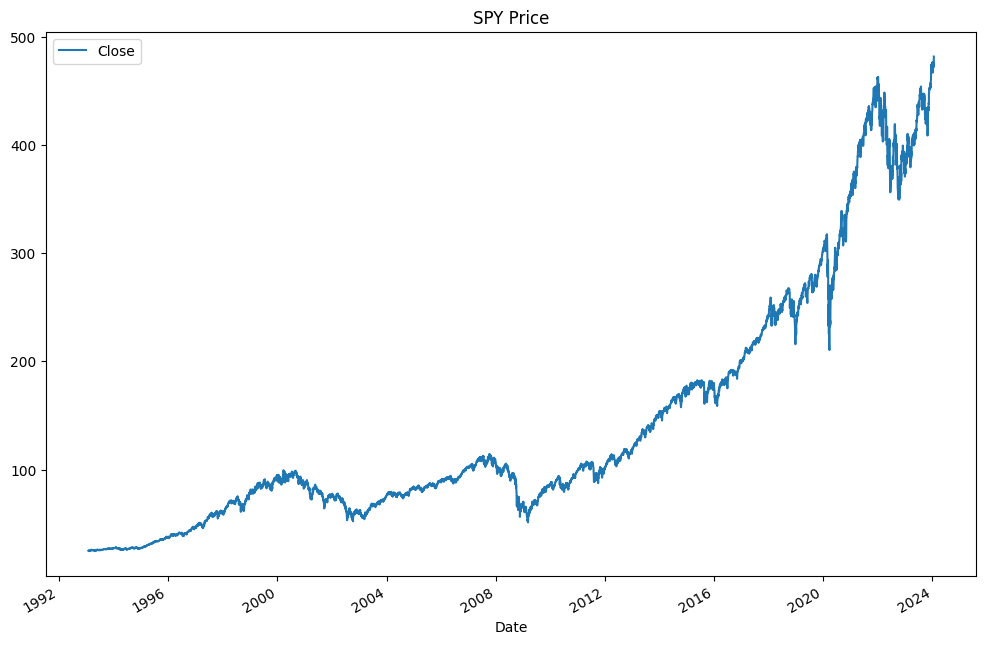

In [5]:
# we plot the data
spy_df.plot(x="Date", y="Close", title="SPY Price", figsize=(12, 8))

<Axes: title={'center': 'SPY Daily Returns'}, xlabel='Date'>

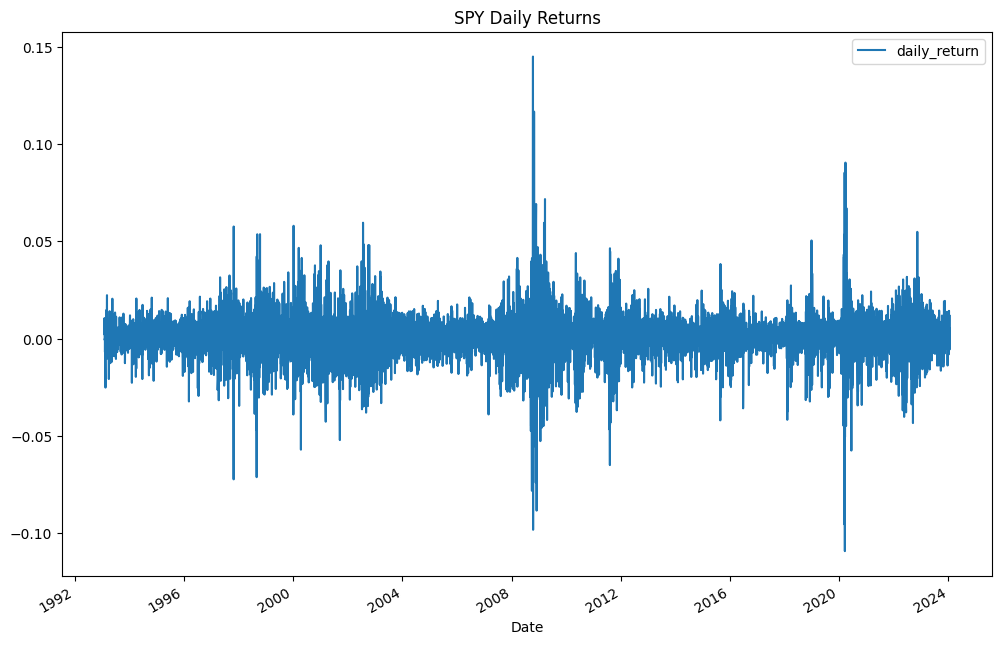

In [6]:
# we get the daily returns
spy_df["daily_return"] = spy_df["Close"].pct_change()

# we plot the daily returns
spy_df.plot(x="Date", y="daily_return", title="SPY Daily Returns", figsize=(12, 8))

<Axes: >

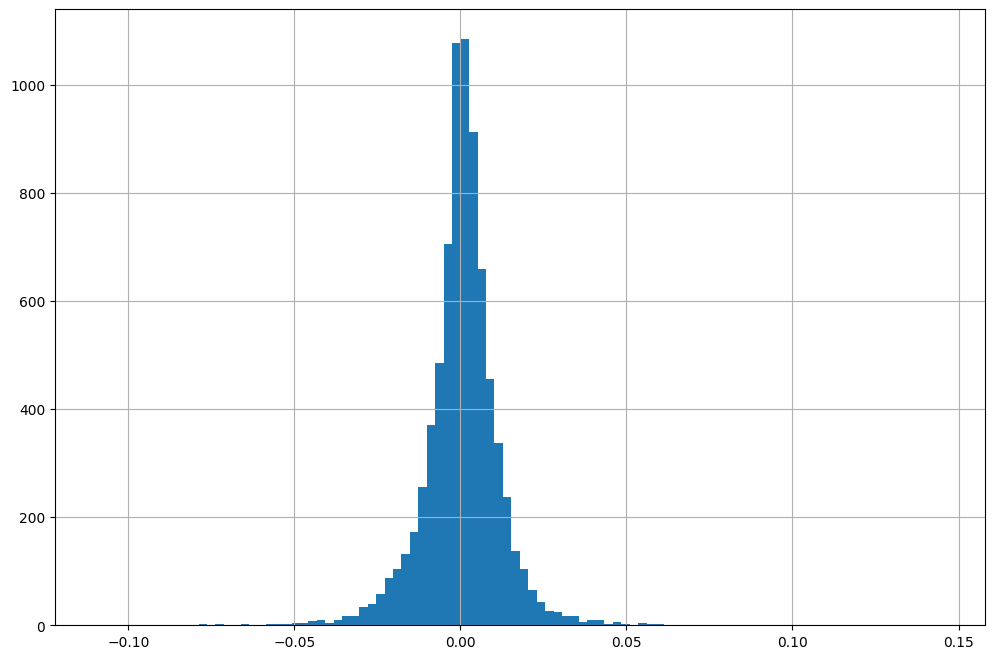

In [7]:
# we plot the distribution of the daily returns
spy_df["daily_return"].hist(bins=100, figsize=(12, 8))

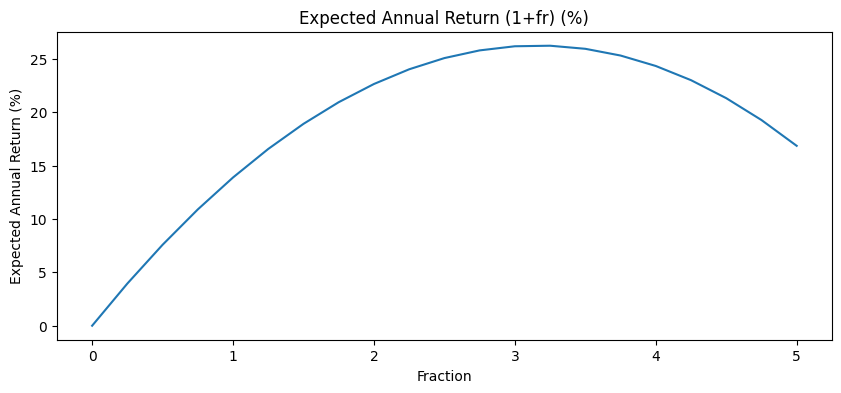

In [24]:
# we add column with log(1 + pct_change)
spy_df["log_return"] = np.log(1 + spy_df["daily_return"])

# we create 20 steps from 0 to 1
fractions = np.linspace(0, 5, 21)

expected_log_return = []
exp_g = []

for f in fractions:
    spy_df[f"log_return_{f}"] = np.log(1 + spy_df["daily_return"] * f)
    
    # we calculate the expected log return by multiplying each log return by its probability and summing them up and dividing by the number of samples
    exp_log_g = spy_df[f"log_return_{f}"].sum() / len(spy_df)
    exp_g.append(100*(np.exp(exp_log_g) - 1)*365)
    
    expected_log_return.append(exp_log_g)

# we plot the expected log return
plt.figure(figsize=(10, 4))
plt.plot(fractions, exp_g)
plt.title("Expected Annual Return (1+fr) (%)")
plt.xlabel("Fraction")
plt.ylabel("Expected Annual Return (%)")
plt.show()

C:\Users\jordi\AppData\Local\Temp\ipykernel_36052\1736997412.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_df_year[f"log_return_{f}"] = np.log(1 + spy_df_year["daily_return"] * f)


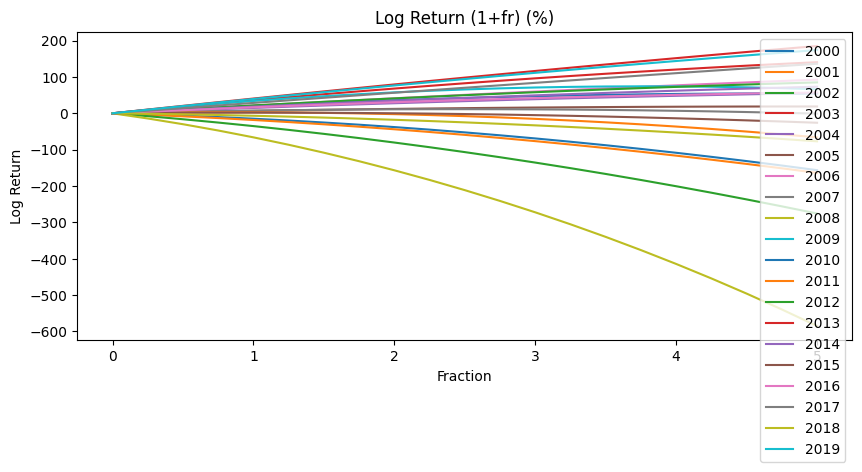

In [9]:
# we repeat the plot, but we create a different series for each year and we plot them together

plt.figure(figsize=(10, 4))
for year in range(2000, 2020):
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    # we create 20 steps from 0 to 1
    fractions = np.linspace(0, 5, 21)
    expected_log_return_year = []
    exp_g = []

    for f in fractions:
        spy_df_year[f"log_return_{f}"] = np.log(1 + spy_df_year["daily_return"] * f)
        
        # we calculate the expected log return by multiplying each log return by its probability and summing them up and dividing by the number of samples
        exp_log_g = spy_df_year[f"log_return_{f}"].sum() / len(spy_df_year)
        exp_g.append(100*(np.exp(exp_log_g) - 1)*365)
        
        expected_log_return.append(exp_log_g)


    plt.plot(fractions, exp_g, label=year)

plt.title("Log Return (1+fr) (%)")
plt.xlabel("Fraction")
plt.ylabel("Log Return")
plt.legend()
plt.show()


In [21]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Assuming spy_df is your DataFrame and it's already loaded with the necessary data

fig = go.Figure()

for year in range(2000, 2023):
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    fractions = np.linspace(0, 10, 21)
    exp_g = []

    for f in fractions:
        spy_df_year[f"log_return_{f}"] = np.log(1 + spy_df_year["daily_return"] * f)
        exp_log_g = spy_df_year[f"log_return_{f}"].sum() / len(spy_df_year)
        exp_g.append(100 * (np.exp(exp_log_g) - 1) * 252)

    fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name=str(year)))
    # we define the optimal fraction as the one that maximizes the expected log return
    optimal_f = fractions[np.argmax(exp_g)]
    print(f"Optimal fraction for {year}: {optimal_f}")


fig.update_layout(
    title="Log Return (1+fr) (%) Over Years",
    xaxis_title="Fraction",
    yaxis_title="Return (%)",
    legend_title="Year"
)

fig.show()


C:\Users\jordi\AppData\Local\Temp\ipykernel_36052\3339175523.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jordi\AppData\Local\Temp\ipykernel_36052\3339175523.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jordi\AppData\Local\Temp\ipykernel_36052\3339175523.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Optimal fraction for 2000: 0.0
Optimal fraction for 2001: 0.0
Optimal fraction for 2002: 0.0
Optimal fraction for 2003: 9.5
Optimal fraction for 2004: 8.5
Optimal fraction for 2005: 5.0
Optimal fraction for 2006: 10.0
Optimal fraction for 2007: 2.5
Optimal fraction for 2008: 0.0
Optimal fraction for 2009: 4.0
Optimal fraction for 2010: 5.0
Optimal fraction for 2011: 1.0
Optimal fraction for 2012: 9.5
Optimal fraction for 2013: 10.0
Optimal fraction for 2014: 10.0
Optimal fraction for 2015: 1.0
Optimal fraction for 2016: 7.0
Optimal fraction for 2017: 10.0
Optimal fraction for 2018: 0.0
Optimal fraction for 2019: 10.0
Optimal fraction for 2020: 2.0
Optimal fraction for 2021: 10.0
Optimal fraction for 2022: 0.0


C:\Users\jordi\AppData\Local\Temp\ipykernel_36052\3339175523.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jordi\AppData\Local\Temp\ipykernel_36052\3339175523.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jordi\AppData\Local\Temp\ipykernel_36052\3339175523.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [70]:
# we get BTC price data from yahoo finance
btc = yf.Ticker("BTC-USD")
btc_df_source = btc.history(period="max")
btc_df_source = btc_df_source.reset_index()
btc_df_source = btc_df_source[["Date", "Close"]]
btc_df_source.head()

Date       Close
0 2014-09-17 00:00:00+00:00  457.334015
1 2014-09-18 00:00:00+00:00  424.440002
2 2014-09-19 00:00:00+00:00  394.795990
3 2014-09-20 00:00:00+00:00  408.903992
4 2014-09-21 00:00:00+00:00  398.821014

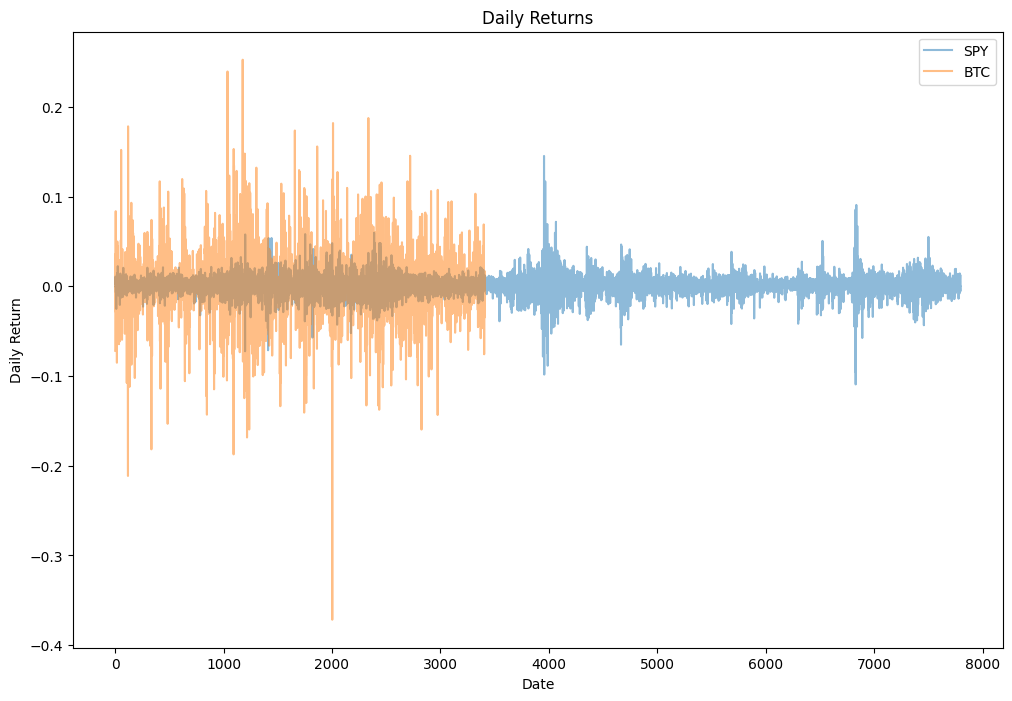

In [31]:
# we get the daily returns
btc_df["daily_return"] = btc_df["Close"].pct_change()
# we plot the daily returns of BTC next to the daily returns of SPY on same plot red and blue
spy_df["daily_return"].plot(figsize=(12, 8), label="SPY", alpha=0.5)
btc_df["daily_return"].plot(figsize=(12, 8), label="BTC", alpha=0.5)
plt.legend()
# we add title and axis labels
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()


SPY mean daily return: 0.0004502565433157962
BTC mean daily return: 0.0020129353211580337


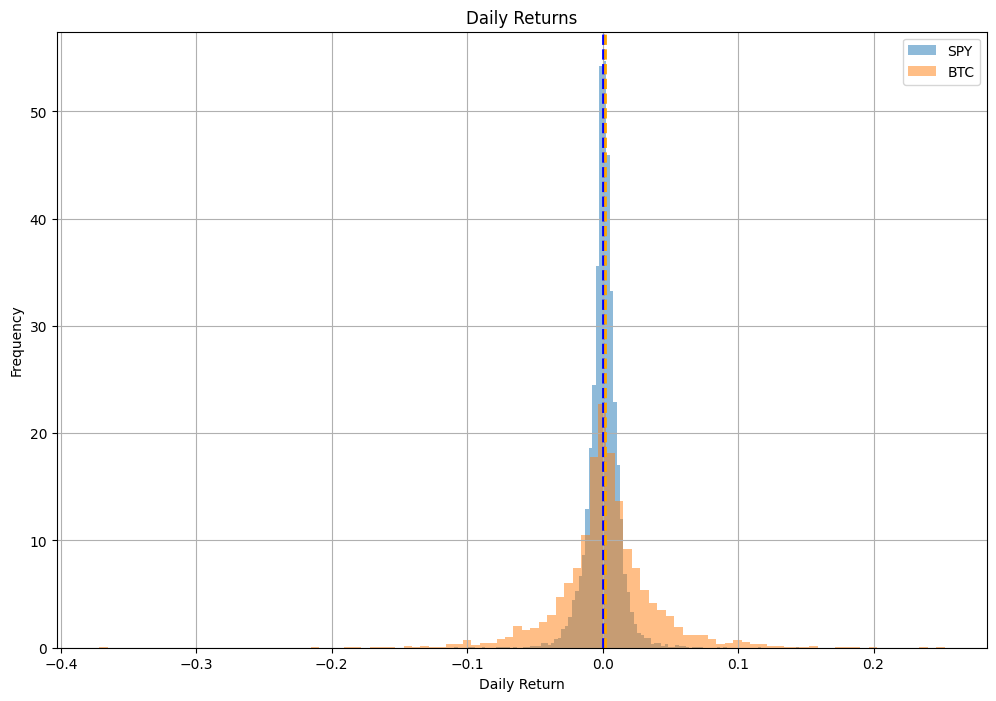

In [35]:
# we plot the distribution of the daily returns of BTC and SPY
spy_df["daily_return"].hist(bins=100, figsize=(12, 8), label="SPY", alpha=0.5, density=True)
btc_df["daily_return"].hist(bins=100, figsize=(12, 8), label="BTC", alpha=0.5, density=True)

# we add a vertical line for the mean of the daily returns of SPY
plt.axvline(spy_df["daily_return"].mean(), color="blue", linestyle="dashed", linewidth=2)
# we print the mean of the daily returns of SPY
print(f"SPY mean daily return: {spy_df['daily_return'].mean()}")
# we add a vertical line for the mean of the daily returns of BTC
plt.axvline(btc_df["daily_return"].mean(), color="orange", linestyle="dashed", linewidth=2)
# we print the mean of the daily returns of BTC
print(f"BTC mean daily return: {btc_df['daily_return'].mean()}")

plt.legend()
# we add title and axis labels
plt.title("Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


In [44]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Assuming spy_df is your DataFrame and it's already loaded with the necessary data

fig = go.Figure()

fractions = np.linspace(0, 10, 21)
exp_g = []

for f in fractions:
    btc_df[f"log_return"] = np.log(1 + btc_df["daily_return"] * f)
    exp_log_g = btc_df[f"log_return"].sum() / len(btc_df)
    exp_g.append(100 * (np.exp(exp_log_g) - 1) * 252)

fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines'))
# we define the optimal fraction as the one that maximizes the expected log return
optimal_f = fractions[np.argmax(exp_g)]
print(f"Optimal fraction for {year}: {optimal_f}")


fig.update_layout(
    title="BTC Log Return (1+fr) (%) Over Years",
    xaxis_title="Fraction",
    yaxis_title="Return (%)",
    legend_title="Year"
)

fig.show()


Optimal fraction for 2022: 1.5


c:\Users\jordi\anaconda3\envs\back_test\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in log



<Axes: title={'center': 'BTC Daily Returns'}, xlabel='Date'>

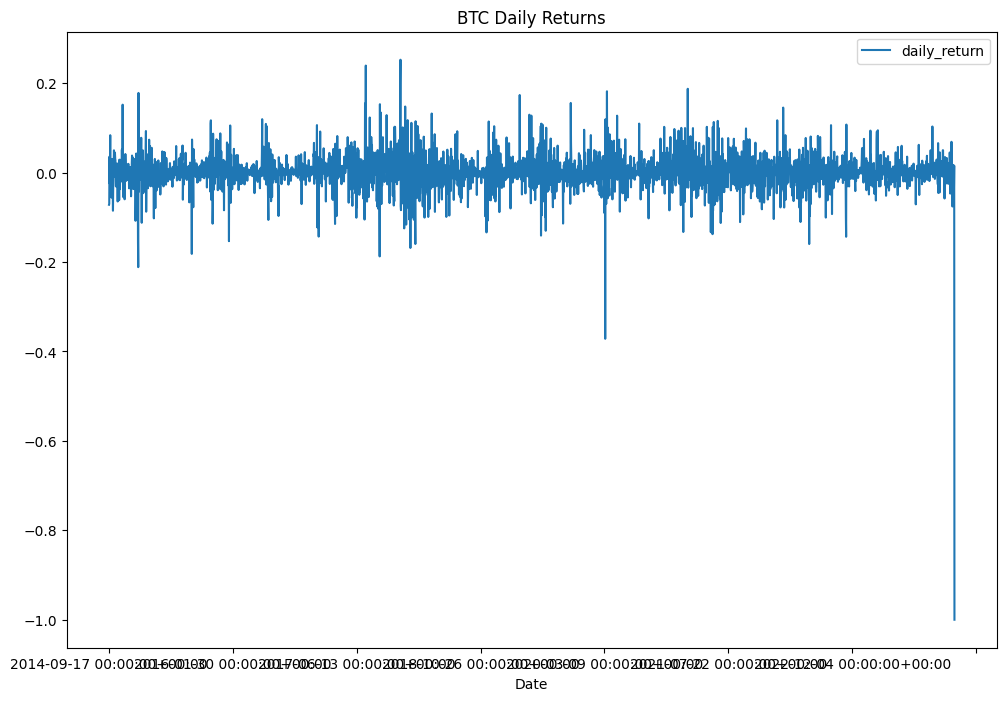

In [79]:

btc_df = btc_df_source.copy()
# we add one sample where price goes to 0.01 and pct_change is -0.99
new_row = {"Date": "2026-01-01", "Close": 0.001}
# we concatenate the new row to the df
btc_df = pd.concat([btc_df, pd.DataFrame(new_row, index=[0])])

# we get the daily returns
btc_df["daily_return"] = btc_df["Close"].pct_change()

# we plot the daily returns
btc_df.plot(x="Date", y="daily_return", title="BTC Daily Returns", figsize=(12, 8))



In [80]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Assuming spy_df is your DataFrame and it's already loaded with the necessary data

fig = go.Figure()

fractions = np.linspace(0, 1, 1001)
exp_g = []

for f in fractions:
    btc_df[f"log_return"] = np.log(1 + btc_df["daily_return"] * f)
    exp_log_g = btc_df[f"log_return"].sum() / len(btc_df)
    exp_g.append(100 * (np.exp(exp_log_g) - 1) * 252)

fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines'))
# we define the optimal fraction as the one that maximizes the expected log return
optimal_f = fractions[np.argmax(exp_g)]
print(f"Optimal fraction: {optimal_f}")

# we add a vertical line for the optimal fraction dashed
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=optimal_f,
            y0=min(exp_g),
            x1=optimal_f,
            y1=max(exp_g),
            line=dict(
                color="Red",
                width=3,
                dash="dashdot"
            )
))

fig.update_layout(
    title="BTC Log Return (1+fr) (%) Over Years",
    xaxis_title="Fraction",
    yaxis_title="Return (%)",
    legend_title="Year"
)

fig.show()


Optimal fraction: 0.715


In [83]:
# btc_df = btc_df_source.copy()
btc_df.tail()

Date         Close  daily_return  log_return
3408 2024-01-16 00:00:00+00:00  43154.945312      0.015125    0.015011
3409 2024-01-17 00:00:00+00:00  42742.652344     -0.009554   -0.009600
3410 2024-01-18 00:00:00+00:00  41262.058594     -0.034640   -0.035254
3411 2024-01-19 00:00:00+00:00  41898.359375      0.015421    0.015303
0    2026-01-01 00:00:00+00:00      0.001000     -1.000000  -17.550757

In [82]:
btc_df['Date'] = pd.to_datetime(btc_df['Date'])

In [88]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Assuming spy_df is your DataFrame and it's already loaded with the necessary data

fig = go.Figure()

for year in range(2015, 2025):
    btc_df_year = btc_df[btc_df["Date"].dt.year == year]
    fractions = np.linspace(0, 10, 21)
    exp_g = []

    for f in fractions:
        btc_df_year[f"log_return_{f}"] = np.log(1 + btc_df_year["daily_return"] * f)
        exp_log_g = btc_df_year[f"log_return_{f}"].sum() / len(btc_df_year)
        exp_g.append(100 * (np.exp(exp_log_g) - 1) * 252)

    fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name=str(year)))
    # we define the optimal fraction as the one that maximizes the expected log return
    optimal_f = fractions[np.argmax(exp_g)]
    print(f"Optimal fraction for {year}: {optimal_f}")


fig.update_layout(
    title="BTC Log Return (1+fr) (%) Over Years",
    xaxis_title="Fraction",
    yaxis_title="Return (%)",
    legend_title="Year"
)

fig.show()


Optimal fraction for 2015: 1.0
Optimal fraction for 2016: 7.0
Optimal fraction for 2017: 3.5
Optimal fraction for 2018: 0.0
Optimal fraction for 2019: 2.0
Optimal fraction for 2020: 5.5
Optimal fraction for 2021: 1.0
Optimal fraction for 2022: 0.0
Optimal fraction for 2023: 5.5
Optimal fraction for 2024: 0.0


C:\Users\jordi\AppData\Local\Temp\ipykernel_36052\2079487537.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jordi\AppData\Local\Temp\ipykernel_36052\2079487537.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jordi\AppData\Local\Temp\ipykernel_36052\2079487537.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [101]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
# we hide warnings
import warnings
warnings.filterwarnings('ignore')
# Assuming spy_df is your DataFrame and it's already loaded with the necessary data

fig = go.Figure()

for year in range(2014, 2024):
    btc_df_year = btc_df[btc_df["Date"].dt.year == year]
    # we append one sample where price goes to 0.01 and pct_change is -0.99
    new_row = {"Date": "2026-01-01", "Close": 0.001}
    # we concatenate the new row to the df
    btc_df_year = pd.concat([btc_df_year, pd.DataFrame(new_row, index=[0])])
    # we get the daily returns
    btc_df_year["daily_return"] = btc_df_year["Close"].pct_change()

    fractions = np.linspace(0, 1, 201)
    exp_g = []

    for f in fractions:
        # we do the natural log of 1 + f * daily_return
        
        btc_df_year[f"log_return_{f}"] = np.log(1 + btc_df_year["daily_return"] * f)
        exp_log_g = btc_df_year[f"log_return_{f}"].sum() / len(btc_df_year)
        exp_g.append((np.exp(len(btc_df_year)*exp_log_g) - 1)*100)

    fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name=str(year)))
    # we define the optimal fraction as the one that maximizes the expected log return
    optimal_f = fractions[np.argmax(exp_g)]
    print(f"Optimal fraction for {year}: {optimal_f}")


fig.update_layout(
    title="BTC Log Return (1+fr) (%) Over Years",
    xaxis_title="Fraction",
    yaxis_title="Return (%)",
    legend_title="Year"
)

fig.show()


Optimal fraction for 2014: 0.0
Optimal fraction for 2015: 0.0
Optimal fraction for 2016: 0.0
Optimal fraction for 2017: 0.61
Optimal fraction for 2018: 0.0
Optimal fraction for 2019: 0.0
Optimal fraction for 2020: 0.33
Optimal fraction for 2021: 0.0
Optimal fraction for 2022: 0.0
Optimal fraction for 2023: 0.025


In [113]:
# we load btc data from csv
btc_df = pd.read_csv("Bitcoin Historical Data.csv")

# we convert the date column to datetime
btc_df["Date"] = pd.to_datetime(btc_df["Date"])

# we keep only Data and Price columns, Price we rename to Close
btc_df = btc_df[["Date", "Price"]]
btc_df = btc_df.rename(columns={"Price": "Close"})
# we remove the comma from the Close column
btc_df["Close"] = btc_df["Close"].str.replace(",", "").astype(float)

btc_df.head()


Date    Close
0 2024-01-19  41903.5
1 2024-01-18  41292.7
2 2024-01-17  42768.7
3 2024-01-16  43145.5
4 2024-01-15  42510.7

In [111]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
# we hide warnings
import warnings
warnings.filterwarnings('ignore')
# Assuming spy_df is your DataFrame and it's already loaded with the necessary data

fig = go.Figure()

# we get the years in the data
years = btc_df["Date"].dt.year.unique()

for year in years:
    btc_df_year = btc_df[btc_df["Date"].dt.year == year]
    # we append one sample where price goes to 0.01 and pct_change is -0.99
    new_row = {"Date": "2026-01-01", "Close": 0.001}
    # we concatenate the new row to the df
    btc_df_year = pd.concat([btc_df_year, pd.DataFrame(new_row, index=[0])])
    # we get the daily returns
    btc_df_year["daily_return"] = btc_df_year["Close"].pct_change()

    fractions = np.linspace(0, 1, 201)
    exp_g = []

    for f in fractions:
        # we do the natural log of 1 + f * daily_return
        
        btc_df_year[f"log_return_{f}"] = np.log(1 + btc_df_year["daily_return"] * f)
        exp_log_g = btc_df_year[f"log_return_{f}"].sum() / len(btc_df_year)
        exp_g.append((np.exp(len(btc_df_year)*exp_log_g) - 1)*100)

    fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name=str(year)))
    # we define the optimal fraction as the one that maximizes the expected log return
    optimal_f = fractions[np.argmax(exp_g)]
    print(f"Optimal fraction for {year}: {optimal_f}")

# we add one final trace for all the years together
fractions = np.linspace(0, 1, 201)
exp_g = []

btc_df = pd.concat([btc_df, pd.DataFrame(new_row, index=[0])])
# we get the daily returns
btc_df["daily_return"] = btc_df["Close"].pct_change()

for f in fractions:
    # we do the natural log of 1 + f * daily_return
    
    btc_df[f"log_return_{f}"] = np.log(1 + btc_df["daily_return"] * f)
    exp_log_g = btc_df[f"log_return_{f}"].sum() / len(btc_df)
    exp_g.append((np.exp(len(btc_df)*exp_log_g) - 1)*100)

fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name="All Years"))
# we define the optimal fraction as the one that maximizes the expected log return
optimal_f = fractions[np.argmax(exp_g)]
print(f"Optimal fraction for all years: {optimal_f}")




fig.update_layout(
    title="BTC Log Return (1+fr) (%) Over Years",
    xaxis_title="Fraction",
    yaxis_title="Return (%)",
    legend_title="Year"
)

fig.show()


Optimal fraction for 2024: 0.0
Optimal fraction for 2023: 0.0
Optimal fraction for 2022: 0.165
Optimal fraction for 2021: 0.0
Optimal fraction for 2020: 0.0
Optimal fraction for 2019: 0.0
Optimal fraction for 2018: 0.3
Optimal fraction for 2017: 0.0
Optimal fraction for 2016: 0.0
Optimal fraction for 2015: 0.0
Optimal fraction for 2014: 0.375
Optimal fraction for 2013: 0.0
Optimal fraction for 2012: 0.0
Optimal fraction for 2011: 0.0
Optimal fraction for 2010: 0.0
Optimal fraction for all years: 0.0


In [110]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
# we hide warnings
import warnings
warnings.filterwarnings('ignore')
# Assuming spy_df is your DataFrame and it's already loaded with the necessary data

fig = go.Figure()

# we get the years in the data
years = btc_df["Date"].dt.year.unique()

for year in years:
    btc_df_year = btc_df[btc_df["Date"].dt.year == year]
    # we append one sample where price goes to 0.01 and pct_change is -0.99
    # new_row = {"Date": "2026-01-01", "Close": 0.001}
    # we concatenate the new row to the df
    # btc_df_year = pd.concat([btc_df_year, pd.DataFrame(new_row, index=[0])])
    # we get the daily returns
    btc_df_year["daily_return"] = btc_df_year["Close"].pct_change()

    fractions = np.linspace(0, 5, 201)
    exp_g = []

    for f in fractions:
        # we do the natural log of 1 + f * daily_return
        
        btc_df_year[f"log_return_{f}"] = np.log(1 + btc_df_year["daily_return"] * f)
        exp_log_g = btc_df_year[f"log_return_{f}"].sum() / len(btc_df_year)
        exp_g.append((np.exp(len(btc_df_year)*exp_log_g) - 1)*100)

    fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name=str(year)))
    # we define the optimal fraction as the one that maximizes the expected log return
    optimal_f = fractions[np.argmax(exp_g)]
    print(f"Optimal fraction for {year}: {optimal_f}")


fig.update_layout(
    title="BTC Log Return (1+fr) (%) Over Years",
    xaxis_title="Fraction",
    yaxis_title="Return (%)",
    legend_title="Year"
)

fig.show()


Optimal fraction for 2024: 3.6
Optimal fraction for 2023: 0.0
Optimal fraction for 2022: 3.075
Optimal fraction for 2021: 0.0
Optimal fraction for 2020: 0.0
Optimal fraction for 2019: 0.0
Optimal fraction for 2018: 2.4250000000000003
Optimal fraction for 2017: 0.0
Optimal fraction for 2016: 0.0
Optimal fraction for 2015: 0.0
Optimal fraction for 2014: 3.35
Optimal fraction for 2013: 0.0
Optimal fraction for 2012: 0.0
Optimal fraction for 2011: 0.0
Optimal fraction for 2010: 5.0


In [154]:
# we load btc data from csv
btc_df = pd.read_csv("Bitcoin Historical Data.csv")

# we convert the date column to datetime
btc_df["Date"] = pd.to_datetime(btc_df["Date"])

# we keep only Data and Price columns, Price we rename to Close
btc_df = btc_df[["Date", "Price"]]
btc_df = btc_df.rename(columns={"Price": "Close"})
# we remove the comma from the Close column
btc_df["Close"] = btc_df["Close"].str.replace(",", "").astype(float)

btc_df.head()


Date    Close
0 2024-01-19  41903.5
1 2024-01-18  41292.7
2 2024-01-17  42768.7
3 2024-01-16  43145.5
4 2024-01-15  42510.7

In [158]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
# we hide warnings
import warnings
warnings.filterwarnings('ignore')
# Assuming spy_df is your DataFrame and it's already loaded with the necessary data

fig = go.Figure()

# we get the years in the data
years = btc_df["Date"].dt.year.unique()

for year in years:
    btc_df_year = btc_df[btc_df["Date"].dt.year == year]
    # we append one sample where price goes to 0.01 and pct_change is -0.99
    # new_row = {"Date": "2026-01-01", "Close": 0.001}
    # we concatenate the new row to the df
    # btc_df_year = pd.concat([btc_df_year, pd.DataFrame(new_row, index=[0])])
    # we get the daily returns
    btc_df_year["daily_return"] = btc_df_year["Close"].pct_change()

    fractions = np.linspace(0, 1, 201)
    exp_g = []

    for f in fractions:
        # we do the natural log of 1 + f * daily_return
        
        btc_df_year[f"log_return_{f}"] = np.log(1 + btc_df_year["daily_return"] * f)
        exp_log_g = btc_df_year[f"log_return_{f}"].sum() / len(btc_df_year)
        # we add one sample where price goes to 0.01 and pct_change is -0.99
        value = np.log(1+f*-0.999)
        probability = 1/1000
        exp_log_g = exp_log_g + value * probability

        exp_g.append((np.exp(len(btc_df_year)*exp_log_g) - 1)*100)

    fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name=str(year)))
    # we define the optimal fraction as the one that maximizes the expected log return
    optimal_f = fractions[np.argmax(exp_g)]
    print(f"Optimal fraction for {year}: {optimal_f}")

# we add one final trace for all the years together
fractions = np.linspace(0, 1, 201)
exp_g = []

# btc_df = pd.concat([btc_df, pd.DataFrame(new_row, index=[0])])
# we get the daily returns
btc_df["daily_return"] = btc_df["Close"].pct_change()

for f in fractions:
    # we do the natural log of 1 + f * daily_return
    
    btc_df[f"log_return_{f}"] = np.log(1 + btc_df["daily_return"] * f)
    exp_log_g = btc_df[f"log_return_{f}"].sum() / len(btc_df)
    value = np.log(1+f*-0.999)
    probability = 1/1000
    exp_log_g = exp_log_g + value * probability
    exp_g.append((np.exp(365*exp_log_g) - 1)*100)

fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name="All Years"))
# we define the optimal fraction as the one that maximizes the expected log return
optimal_f = fractions[np.argmax(exp_g)]
print(f"Optimal fraction for all years: {optimal_f}")
fig.update_layout(
    title="BTC Log Return (1+fr) (%) Over Years",
    xaxis_title="Fraction",
    yaxis_title="Return (%)",
    legend_title="Year"
)

fig.show()


Optimal fraction for 2024: 0.625
Optimal fraction for 2023: 0.0
Optimal fraction for 2022: 0.635
Optimal fraction for 2021: 0.0
Optimal fraction for 2020: 0.0
Optimal fraction for 2019: 0.0
Optimal fraction for 2018: 0.685
Optimal fraction for 2017: 0.0
Optimal fraction for 2016: 0.0
Optimal fraction for 2015: 0.0
Optimal fraction for 2014: 0.5700000000000001
Optimal fraction for 2013: 0.0
Optimal fraction for 2012: 0.0
Optimal fraction for 2011: 0.0
Optimal fraction for 2010: 0.08
Optimal fraction for all years: 0.0


In [126]:
# we plot the distribution of the daily returns of BTC for each year in plotly

fig = go.Figure()

for year in years:
    btc_df_year = btc_df[btc_df["Date"].dt.year == year]
    fig.add_trace(go.Histogram(x=btc_df_year["daily_return"], name=str(year), histnorm='probability', xbins=dict(start=-1, end=1, size=0.01)))

fig.update_layout(
    title="BTC Daily Return Distribution",
    xaxis_title="Daily Return",
    yaxis_title="Probability",
    legend_title="Year"
)

fig.show()


In [152]:
# we plot the distribution of the daily returns of BTC for each year in plotly

fig = go.Figure()

for year in years:
    btc_df_year = btc_df[btc_df["Date"].dt.year == year]
    # we make it so all histograms are overlapping on same x axis, and make all same color and opacity
    # fig.add_trace(go.Histogram(x=btc_df_year["daily_return"], name=str(year), histnorm='probability', xbins=dict(start=-1, end=1, size=0.01), opacity=0.5))

    # we manually make the hisogram. First we bin the data
    x = btc_df_year["daily_return"]
    bins = np.linspace(-1, 1, 101)
    # we get the counts for each bin
    counts, edges = np.histogram(x, bins=bins)
    # we get the probability for each bin
    probabilities = counts / counts.sum()
    # we get the center of each bin
    centers = (edges[:-1] + edges[1:]) / 2
    # we plot the histogram as bars of opacity 0.5
    
    # we want the bars to be centered on the center of each bin and overlapping with each other
    # we get the width of each bar
    width = (centers[1] - centers[0]) * 0.5
    # we plot the histogram as bars of opacity 0.5 and color blue
    fig.add_trace(go.Bar(x=edges, y=probabilities, name=str(year), width=width, opacity=0.25))


fig.update_layout(
    title="BTC Daily Return Distribution",
    xaxis_title="Daily Return",
    yaxis_title="Probability",
    legend_title="Year"
)

fig.show()


In [176]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
# we hide warnings
import warnings
warnings.filterwarnings('ignore')
# Assuming spy_df is your DataFrame and it's already loaded with the necessary data
probability_swan = 1/10000
swan_return = -0.9999
fig = go.Figure()

# we get the years in the data
years = spy_df["Date"].dt.year.unique()

for year in years:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    # we append one sample where price goes to 0.01 and pct_change is -0.99
    # new_row = {"Date": "2026-01-01", "Close": 0.001}
    # we concatenate the new row to the df
    # btc_df_year = pd.concat([btc_df_year, pd.DataFrame(new_row, index=[0])])
    # we get the daily returns
    spy_df_year["daily_return"] = spy_df_year["Close"].pct_change()

    fractions = np.linspace(0, 1.5, 201)
    exp_g = []

    for f in fractions:
        # we do the natural log of 1 + f * daily_return
        
        spy_df_year[f"log_return_{f}"] = np.log(1 + spy_df_year["daily_return"] * f)
        exp_log_g = spy_df_year[f"log_return_{f}"].sum() / len(spy_df_year)
        # we add one sample where price goes to 0.01 and pct_change is -0.99
        value = np.log(1+f*swan_return)
        # probability_swan = 1/1000
        exp_log_g = exp_log_g + value * probability_swan

        exp_g.append((np.exp(252*exp_log_g) - 1)*100)

    fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name=str(year), opacity=0.2))
    # we define the optimal fraction as the one that maximizes the expected log return
    optimal_f = fractions[np.argmax(exp_g)]
    # print(f"Optimal fraction for {year}: {optimal_f}")

# we add one final trace for all the years together
fractions = np.linspace(0, 1.5, 201)
exp_g = []

# btc_df = pd.concat([btc_df, pd.DataFrame(new_row, index=[0])])
# we get the daily returns
btc_df["daily_return"] = btc_df["Close"].pct_change()

for f in fractions:
    # we do the natural log of 1 + f * daily_return
    
    spy_df[f"log_return_{f}"] = np.log(1 + spy_df["daily_return"] * f)
    exp_log_g = spy_df[f"log_return_{f}"].sum() / len(spy_df)
    value = np.log(1+f*swan_return)
    # probability_swan = 1/10000
    exp_log_g = exp_log_g + value * probability_swan
    exp_g.append((np.exp(252*exp_log_g) - 1)*100)

fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name="All Years"))
# we define the optimal fraction as the one that maximizes the expected log return
optimal_f = fractions[np.argmax(exp_g)]
# print(f"Optimal fraction for all years: {optimal_f}")
fig.update_layout(
    title="SPY Log Return (1+fr) (%) Over Years",
    xaxis_title="Fraction",
    yaxis_title="Return (%)",
    legend_title="Year"
)

fig.show()


In [182]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
# we hide warnings
import warnings
warnings.filterwarnings('ignore')
# Assuming spy_df is your DataFrame and it's already loaded with the necessary data
probability_swan = 1/3000
swan_return = -0.999
fig = go.Figure()

# we get the years in the data
years = spy_df["Date"].dt.year.unique()

for year in years:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    # we append one sample where price goes to 0.01 and pct_change is -0.99
    # new_row = {"Date": "2026-01-01", "Close": 0.001}
    # we concatenate the new row to the df
    # btc_df_year = pd.concat([btc_df_year, pd.DataFrame(new_row, index=[0])])
    # we get the daily returns
    spy_df_year["daily_return"] = spy_df_year["Close"].pct_change()

    fractions = np.linspace(0, 1, 201)
    exp_g = []

    for f in fractions:
        # we do the natural log of 1 + f * daily_return
        
        spy_df_year[f"log_return_{f}"] = np.log(1 + spy_df_year["daily_return"] * f)
        exp_log_g = spy_df_year[f"log_return_{f}"].sum() / len(spy_df_year)
        # we add one sample where price goes to 0.01 and pct_change is -0.99
        value = np.log(1+f*swan_return)
        # probability_swan = 1/1000
        exp_log_g = exp_log_g + value * probability_swan

        exp_g.append((np.exp(252*exp_log_g) - 1)*100)

    fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name=str(year), opacity=0.2))
    # we define the optimal fraction as the one that maximizes the expected log return
    optimal_f = fractions[np.argmax(exp_g)]
    # print(f"Optimal fraction for {year}: {optimal_f}")

# we add one final trace for all the years together
fractions = np.linspace(0, 1, 201)
exp_g = []

# btc_df = pd.concat([btc_df, pd.DataFrame(new_row, index=[0])])
# we get the daily returns
btc_df["daily_return"] = btc_df["Close"].pct_change()

for f in fractions:
    # we do the natural log of 1 + f * daily_return
    
    spy_df[f"log_return_{f}"] = np.log(1 + spy_df["daily_return"] * f)
    exp_log_g = spy_df[f"log_return_{f}"].sum() / len(spy_df)
    value = np.log(1+f*swan_return)
    # probability_swan = 1/10000
    exp_log_g = exp_log_g + value * probability_swan
    exp_g.append((np.exp(252*exp_log_g) - 1)*100)

fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name="All Years"))
# we define the optimal fraction as the one that maximizes the expected log return
optimal_f = fractions[np.argmax(exp_g)]
# print(f"Optimal fraction for all years: {optimal_f}")
fig.update_layout(
    title="SPY Log Return (1+fr) (%) Over Years",
    xaxis_title="Fraction",
    yaxis_title="Return (%)",
    legend_title="Year",
    # we make all plot background transparent
    plot_bgcolor='rgba(0,0,0,0)',
)

fig.show()


In [195]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
# we hide warnings
import warnings
warnings.filterwarnings('ignore')
# Assuming spy_df is your DataFrame and it's already loaded with the necessary data
probability_swan = 1/30000
swan_return = -0.99
fig = go.Figure()

# we get the years in the data
years = spy_df["Date"].dt.year.unique()

for year in years:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    # we append one sample where price goes to 0.01 and pct_change is -0.99
    # new_row = {"Date": "2026-01-01", "Close": 0.001}
    # we concatenate the new row to the df
    # btc_df_year = pd.concat([btc_df_year, pd.DataFrame(new_row, index=[0])])
    # we get the daily returns
    spy_df_year["daily_return"] = spy_df_year["Close"].pct_change()

    fractions = np.linspace(0, 1, 201)
    exp_g = []

    for f in fractions:
        # we do the natural log of 1 + f * daily_return
        
        spy_df_year[f"log_return_{f}"] = np.log(1 + spy_df_year["daily_return"] * f)
        exp_log_g = spy_df_year[f"log_return_{f}"].sum() / len(spy_df_year)
        # we add one sample where price goes to 0.01 and pct_change is -0.99
        value = np.log(1+f*swan_return)
        # probability_swan = 1/1000
        exp_log_g = exp_log_g + value * probability_swan

        exp_g.append((np.exp(252*exp_log_g) - 1)*100)

    fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name=str(year), opacity=0.2))
    # we define the optimal fraction as the one that maximizes the expected log return
    optimal_f = fractions[np.argmax(exp_g)]
    # print(f"Optimal fraction for {year}: {optimal_f}")
    # we add a vertical line for the optimal fraction dashed
    fig.add_shape(
            # Line Vertical
            dict(
                type="line",
                x0=optimal_f,
                y0=0,
                x1=optimal_f,
                y1=max(exp_g),
                line=dict(
                    color="Red",
                    width=3,
                    dash="dashdot",
                    # opacity=0.5
                )
    ))

# we add one final trace for all the years together
fractions = np.linspace(0, 1, 201)
exp_g = []

# btc_df = pd.concat([btc_df, pd.DataFrame(new_row, index=[0])])
# we get the daily returns
btc_df["daily_return"] = btc_df["Close"].pct_change()

for f in fractions:
    # we do the natural log of 1 + f * daily_return
    
    spy_df[f"log_return_{f}"] = np.log(1 + spy_df["daily_return"] * f)
    exp_log_g = spy_df[f"log_return_{f}"].sum() / len(spy_df)
    value = np.log(1+f*swan_return)
    # probability_swan = 1/10000
    exp_log_g = exp_log_g + value * probability_swan
    exp_g.append((np.exp(252*exp_log_g) - 1)*100)

fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name="All Years"))
# we define the optimal fraction as the one that maximizes the expected log return
optimal_f = fractions[np.argmax(exp_g)]

# we add a vertical line for the optimal fraction dashed
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=optimal_f,
            y0=0,
            x1=optimal_f,
            y1=max(exp_g),
            line=dict(
                color="Blue",
                width=3,
                dash="dashdot",
                # opacity=0.5
            )
))


# print(f"Optimal fraction for all years: {optimal_f}")
fig.update_layout(
    title="SPY Log Return (1+fr) (%) Over Years",
    xaxis_title="Fraction",
    yaxis_title="Return (%)",
    legend_title="Year",
    # we make all plot background transparent
    plot_bgcolor='rgba(0,0,0,0)',
)

fig.show()


In [201]:
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np
import pandas as pd

# Assuming spy_df is your DataFrame and it's already loaded with the necessary data

# First subplot with swan parameters: 1/30000, -0.99
probability_swan1 = 1/1000
swan_return1 = -0.99

# Second subplot with swan parameters: 1/10000, -0.80
probability_swan2 = 1/10000
swan_return2 = -0.80



years = spy_df["Date"].dt.year.unique()
fractions = np.linspace(0, 1, 201)


# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Swan Parameter: {}, Return: {}".format(probability_swan1,swan_return1), "Swan Parameter: 1/10000, Return: -0.80".format(probability_swan2,swan_return2)))



for subplot, (probability_swan, swan_return) in enumerate([(probability_swan1, swan_return1), (probability_swan2, swan_return2)], start=1):
    for year in years:
        spy_df_year = spy_df[spy_df["Date"].dt.year == year]
        spy_df_year["daily_return"] = spy_df_year["Close"].pct_change()

        exp_g = []
        for f in fractions:
            spy_df_year[f"log_return_{f}"] = np.log(1 + spy_df_year["daily_return"] * f)
            exp_log_g = spy_df_year[f"log_return_{f}"].sum() / len(spy_df_year)
            value = np.log(1 + f * swan_return)
            exp_log_g = exp_log_g + value * probability_swan
            exp_g.append((np.exp(252 * exp_log_g) - 1) * 100)

        fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name=f"Year {year}", opacity=0.2), row=1, col=subplot)
        optimal_f = fractions[np.argmax(exp_g)]
        fig.add_shape(
            dict(
                type="line",
                x0=optimal_f,
                y0=0,
                x1=optimal_f,
                y1=max(exp_g),
                line=dict(
                    color="Red",
                    width=2,
                    dash="dashdot",
                )
            ), row=1, col=subplot
        )

fig.update_layout(
    title="SPY Log Return (1+fr) (%) Over Years with Different Swan Parameters",
    xaxis_title="Fraction",
    yaxis_title="Return (%)",
    legend_title="Year",
    plot_bgcolor='rgba(0,0,0,0)',
)

# Display the figure
fig.show()


This doesn't seem to be helping me. I want to look at the distributions of top and bottom Kelly samples. This is 2024. 1995. And word 2002, 2008.

I want to plot the daily return distributions for these two years.

In [205]:
# I want to plot the daily return distributions of four years, 2024, 1995 in red, and 2002 and 2008 in blue.

# we plot the distribution of the daily returns of SPY for each year in plotly
fig = go.Figure()

for year in [2024, 1995, 2002, 2008]:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    # we make it so all histograms are overlapping on same x axis, and make all same color and opacity
    # fig.add_trace(go.Histogram(x=spy_df_year["daily_return"], name=str(year), histnorm='probability', xbins=dict(start=-1, end=1, size=0.01), opacity=0.5))

    # we manually make the hisogram. First we bin the data
    x = spy_df_year["daily_return"]
    bins = np.linspace(-1, 1, 101)
    # we get the counts for each bin
    counts, edges = np.histogram(x, bins=bins)
    # we get the probability for each bin
    probabilities = counts / counts.sum()
    # we get the center of each bin
    centers = (edges[:-1] + edges[1:]) / 2
    # we plot the histogram as bars of opacity 0.5

    # we want the bars to be centered on the center of each bin and overlapping with each other
    # we get the width of each bar
    width = (centers[1] - centers[0]) * 0.5
    # we plot the histogram as bars of opacity 0.5 and color blue
    fig.add_trace(go.Line(x=edges, y=probabilities, name=str(year), opacity=0.25))


fig.update_layout(
    title="SPY Daily Return Distribution",
    xaxis_title="Daily Return",
    yaxis_title="Probability",
    legend_title="Year"
)



fig.show()

In [215]:

# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("SPY Daily Return Distribution", "SPY Log Return (1+fr) (%) Over Years"))

# Plot 1: Daily Return Distributions
years_to_plot = [2024, 1995, 2002, 2008]
for year in years_to_plot:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    x = spy_df_year["daily_return"]
    bins = np.linspace(-1, 1, 201)
    counts, edges = np.histogram(x, bins=bins)
    probabilities = counts / counts.sum()
    centers = (edges[:-1] + edges[1:]) / 2
    width = (centers[1] - centers[0]) * 0.5
    color = "red" if year in [2024, 1995] else "blue"
    fig.add_trace(go.Bar(x=centers, y=probabilities, name=str(year), width=width, opacity=0.5, marker_color=color), row=1, col=1)

# Plot 2: Expected Log Return
probability_swan = 1/30000
swan_return = -0.99
fractions = np.linspace(0, 1, 201)
for year in years_to_plot:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    spy_df_year["daily_return"] = spy_df_year["Close"].pct_change()
    exp_g = []
    for f in fractions:
        spy_df_year[f"log_return_{f}"] = np.log(1 + spy_df_year["daily_return"] * f)
        exp_log_g = spy_df_year[f"log_return_{f}"].sum() / len(spy_df_year)
        value = np.log(1 + f * swan_return)
        exp_log_g = exp_log_g + value * probability_swan
        exp_g.append((np.exp(252 * exp_log_g) - 1) * 100)
    color = "red" if year in [2024, 1995] else "blue"
    fig.add_trace(go.Scatter(x=fractions, y=exp_g, mode='lines', name=str(year), opacity=0.2, marker_color=color), row=1, col=2)
    optimal_f = fractions[np.argmax(exp_g)]

# we make range of x axis -0,5 to 0.5 on the first plot in row 1 column 1
fig.update_xaxes(range=[-0.1, 0.1], row=1, col=1)

# Update layout
fig.update_layout(
    title="SPY Analysis: Daily Return Distribution and Log Return Over Years",
    xaxis_title="Daily Return",
    yaxis_title="Probability",
    legend_title="Year",
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis2_title="Fraction",
    yaxis2_title="Return (%)",

    
)

# Display the figure
fig.show()

Clearly when the years go "fat tailed" (blue) then Kelly Criterion tells us to stay out. 

I want to now plot the optimal fractions if I consider the combined distribution of these four extreme years together


In [229]:
# we create a spy_df filtered for the four years we want to plot. We will add this as a new series to the previous plot.

import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np
import pandas as pd

# Assuming spy_df is your DataFrame and it's already loaded with the necessary data

# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("SPY Daily Return Distribution", "SPY Log Return (1+fr) (%) Over Years"))

# Plot 1: Daily Return Distributions
years_to_plot = [2024, 1995, 2002, 2008]
combined_df = pd.DataFrame()  # DataFrame to store combined data

for year in years_to_plot:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    combined_df = pd.concat([combined_df, spy_df_year])  # Combine data for the third series
    x = spy_df_year["daily_return"]
    bins = np.linspace(-1, 1, 201)
    counts, edges = np.histogram(x, bins=bins)
    probabilities = counts / counts.sum()
    centers = (edges[:-1] + edges[1:]) / 2
    width = (centers[1] - centers[0]) * 0.5
    color = "red" if year in [2024, 1995] else "blue"
    fig.add_trace(go.Line(x=centers, y=probabilities, name=str(year), opacity=0.5, marker_color=color), row=1, col=1)

# Adding the combined data in green
x_combined = combined_df["daily_return"]
counts_combined, edges_combined = np.histogram(x_combined, bins=bins)
probabilities_combined = counts_combined / counts_combined.sum()
fig.add_trace(go.Line(x=centers, y=probabilities_combined, name="Combined",  opacity=0.5, marker_color="green"), row=1, col=1)

# Plot 2: Expected Log Return
probability_swan = 1/300000
swan_return = -0.5
fractions = np.linspace(0, 1, 201)
for year in years_to_plot:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    spy_df_year["daily_return"] = spy_df_year["Close"].pct_change()
    exp_g = []
    for f in fractions:
        spy_df_year[f"log_return_{f}"] = np.log(1 + spy_df_year["daily_return"] * f)
        exp_log_g = spy_df_year[f"log_return_{f}"].sum() / len(spy_df_year)
        value = np.log(1 + f * swan_return)
        exp_log_g = exp_log_g + value * probability_swan
        exp_g.append((np.exp(252 * exp_log_g) - 1) * 100)
    color = "red" if year in [2024, 1995] else "blue"
    fig.add_trace(go.Line(x=fractions, y=exp_g, mode='lines', name=str(year), opacity=0.2, marker_color=color), row=1, col=2)

# Adding the combined data in green for the second plot
combined_df["daily_return"] = combined_df["Close"].pct_change()
exp_g_combined = []
for f in fractions:
    combined_df[f"log_return_{f}"] = np.log(1 + combined_df["daily_return"] * f)
    exp_log_g_combined = combined_df[f"log_return_{f}"].sum() / len(combined_df)
    value = np.log(1 + f * swan_return)
    exp_log_g_combined = exp_log_g_combined + value * probability_swan
    exp_g_combined.append((np.exp(252 * exp_log_g_combined) - 1) * 100)
fig.add_trace(go.Line(x=fractions, y=exp_g_combined, mode='lines', name="Combined", opacity=0.2, marker_color="green"), row=1, col=2)

# we add a green vertical line for the optimal fraction dashed for the combined data
optimal_f = fractions[np.argmax(exp_g_combined)]
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=optimal_f,
            y0=min(exp_g_combined),
            x1=optimal_f,
            y1=max(exp_g_combined),
            line=dict(
                color="Green",
                width=3,
                dash="dashdot",
                # opacity=0.5
            ),
    ), row=1, col=2
)



# Update layout and axes
fig.update_xaxes(range=[-0.1, 0.1], row=1, col=1)
fig.update_layout(
    title="SPY Analysis: Daily Return Distribution and Log Return Over Years",
    legend_title="Year",
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis2_title="Fraction",
    yaxis2_title="Return (%)"
)

# we add the swan parameters to the title of the second plot

fig.update_layout(
    title="SPY Analysis: Daily Return Distribution and Log Return Over Years with Swan Parameters: 1/300000, -0.8",
    legend_title="Year",
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis2_title="Fraction",
    yaxis2_title="Return (%)"
)

# Display the figure
fig.show()


In [235]:
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np
import pandas as pd

# Assuming spy_df is your DataFrame and it's already loaded with the necessary data

# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("SPY Daily Return Distribution", "SPY Log Return (1+fr) (%) Over Years"))

# Plot 1: Daily Return Distributions
years_to_plot = [2024, 1995, 2002, 2008]
combined_df = pd.DataFrame()  # DataFrame to store combined data

for year in years_to_plot:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    combined_df = pd.concat([combined_df, spy_df_year])  # Combine data for the third series
    x = spy_df_year["daily_return"]
    bins = np.linspace(-1, 1, 201)
    counts, edges = np.histogram(x, bins=bins)
    probabilities = counts / counts.sum()
    centers = (edges[:-1] + edges[1:]) / 2
    width = (centers[1] - centers[0]) * 0.5
    color = "red" if year in [2024, 1995] else "blue"
    fig.add_trace(go.Line(x=centers, y=probabilities, name=str(year), opacity=0.5, marker_color=color), row=1, col=1)

# Adding the combined data in green
x_combined = combined_df["daily_return"]
counts_combined, edges_combined = np.histogram(x_combined, bins=bins)
probabilities_combined = counts_combined / counts_combined.sum()
fig.add_trace(go.Line(x=centers, y=probabilities_combined, name="Combined",  opacity=0.5, marker_color="green"), row=1, col=1)

# Adding all years data in yellow
x_all = spy_df["daily_return"]
counts_all, edges_all = np.histogram(x_all, bins=bins)
probabilities_all = counts_all / counts_all.sum()
fig.add_trace(go.Line(x=centers, y=probabilities_all, name="All Years",  opacity=0.5, marker_color="orange"), row=1, col=1)

# Plot 2: Expected Log Return
probability_swan = 1/300000
swan_return = -0.5
fractions = np.linspace(0, 1, 201)
for year in years_to_plot:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    spy_df_year["daily_return"] = spy_df_year["Close"].pct_change()
    exp_g = []
    for f in fractions:
        spy_df_year[f"log_return_{f}"] = np.log(1 + spy_df_year["daily_return"] * f)
        exp_log_g = spy_df_year[f"log_return_{f}"].sum() / len(spy_df_year)
        value = np.log(1 + f * swan_return)
        exp_log_g = exp_log_g + value * probability_swan
        exp_g.append((np.exp(252 * exp_log_g) - 1) * 100)
    color = "red" if year in [2024, 1995] else "blue"
    fig.add_trace(go.Line(x=fractions, y=exp_g, mode='lines', name=str(year), opacity=0.2, marker_color=color), row=1, col=2)

# Adding the combined and all years data in green and yellow for the second plot
combined_df["daily_return"] = combined_df["Close"].pct_change()
exp_g_combined = []
for f in fractions:
    combined_df[f"log_return_{f}"] = np.log(1 + combined_df["daily_return"] * f)
    exp_log_g_combined = combined_df[f"log_return_{f}"].sum() / len(combined_df)
    value = np.log(1 + f * swan_return)
    exp_log_g_combined = exp_log_g_combined + value * probability_swan
    exp_g_combined.append((np.exp(252 * exp_log_g_combined) - 1) * 100)
fig.add_trace(go.Line(x=fractions, y=exp_g_combined, mode='lines', name="Combined", opacity=0.2, marker_color="green"), row=1, col=2)


# we add a green vertical line for the optimal fraction dashed for the combined data
optimal_f = fractions[np.argmax(exp_g_combined)]
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=optimal_f,
            y0=min(exp_g_combined),
            x1=optimal_f,
            y1=max(exp_g_combined),
            line=dict(
                color="Green",
                width=3,
                dash="dashdot",
                # opacity=0.5
            ),
    ), row=1, col=2
)


spy_df["daily_return"] = spy_df["Close"].pct_change()
exp_g_all = []
for f in fractions:
    spy_df[f"log_return_{f}"] = np.log(1 + spy_df["daily_return"] * f)
    exp_log_g_all = spy_df[f"log_return_{f}"].sum() / len(spy_df)
    value = np.log(1 + f * swan_return)
    exp_log_g_all = exp_log_g_all + value * probability_swan
    exp_g_all.append((np.exp(252 * exp_log_g_all) - 1) * 100)
fig.add_trace(go.Line(x=fractions, y=exp_g_all, mode='lines', name="All Years", opacity=0.2, marker_color="orange"), row=1, col=2)

optimal_f = fractions[np.argmax(exp_g_all)]
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=optimal_f,
            y0=min(exp_g_all),
            x1=optimal_f,
            y1=max(exp_g_all),
            line=dict(
                color="Orange",
                width=3,
                dash="dashdot",
                # opacity=0.5
            ),
    ), row=1, col=2
)

# Update layout and axes
fig.update_xaxes(range=[-0.1, 0.1], row=1, col=1)
fig.update_layout(
    title="SPY Analysis: Daily Return Distribution and Log Return Over Years with Swan Parameters: 1/300000, -0.5",
    legend_title="Year",
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis2_title="Fraction",
    yaxis2_title="Return (%)"
)

# Display the figure
fig.show()


This still seems quite imprecise. If I use all years I am told to go all in. If I use only  extreme up and extrem down, I am told to put in 20%, if I use all years data, I am told 100%. Let me make the possibility of a black swan once a year.

In [250]:
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np
import pandas as pd

# Assuming spy_df is your DataFrame and it's already loaded with the necessary data

# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("SPY Daily Return Distribution", "SPY Log Return (1+fr) (%) Over Years"))

# Plot 1: Daily Return Distributions
years_to_plot = [2024, 1995, 2002, 2008]
combined_df = pd.DataFrame()  # DataFrame to store combined data

for year in years_to_plot:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    combined_df = pd.concat([combined_df, spy_df_year])  # Combine data for the third series
    x = spy_df_year["daily_return"]
    bins = np.linspace(-1, 1, 201)
    counts, edges = np.histogram(x, bins=bins)
    probabilities = counts / counts.sum()
    centers = (edges[:-1] + edges[1:]) / 2
    width = (centers[1] - centers[0]) * 0.5
    color = "red" if year in [2024, 1995] else "blue"
    fig.add_trace(go.Line(x=centers, y=probabilities, name=str(year), opacity=0.5, marker_color=color), row=1, col=1)

# Adding the combined data in green
x_combined = combined_df["daily_return"]
counts_combined, edges_combined = np.histogram(x_combined, bins=bins)
probabilities_combined = counts_combined / counts_combined.sum()
fig.add_trace(go.Line(x=centers, y=probabilities_combined, name="Combined",  opacity=0.5, marker_color="green"), row=1, col=1)

# Adding all years data in yellow
x_all = spy_df["daily_return"]
counts_all, edges_all = np.histogram(x_all, bins=bins)
probabilities_all = counts_all / counts_all.sum()
fig.add_trace(go.Line(x=centers, y=probabilities_all, name="All Years",  opacity=0.5, marker_color="orange"), row=1, col=1)

# Plot 2: Expected Log Return
probability_swan = 1/3650
swan_return = -0.6
fractions = np.linspace(0, 1, 201)
for year in years_to_plot:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    spy_df_year["daily_return"] = spy_df_year["Close"].pct_change()
    exp_g = []
    for f in fractions:
        spy_df_year[f"log_return_{f}"] = np.log(1 + spy_df_year["daily_return"] * f)
        exp_log_g = spy_df_year[f"log_return_{f}"].sum() / len(spy_df_year)
        value = np.log(1 + f * swan_return)
        exp_log_g = exp_log_g + value * probability_swan
        exp_g.append((np.exp(252 * exp_log_g) - 1) * 100)
    color = "red" if year in [2024, 1995] else "blue"
    fig.add_trace(go.Line(x=fractions, y=exp_g, mode='lines', name=str(year), opacity=0.2, marker_color=color), row=1, col=2)

# Adding the combined and all years data in green and yellow for the second plot
combined_df["daily_return"] = combined_df["Close"].pct_change()
exp_g_combined = []
for f in fractions:
    combined_df[f"log_return_{f}"] = np.log(1 + combined_df["daily_return"] * f)
    exp_log_g_combined = combined_df[f"log_return_{f}"].sum() / len(combined_df)
    value = np.log(1 + f * swan_return)
    exp_log_g_combined = exp_log_g_combined + value * probability_swan
    exp_g_combined.append((np.exp(252 * exp_log_g_combined) - 1) * 100)
fig.add_trace(go.Line(x=fractions, y=exp_g_combined, mode='lines', name="Combined", opacity=0.2, marker_color="green"), row=1, col=2)


# we add a green vertical line for the optimal fraction dashed for the combined data
optimal_f = fractions[np.argmax(exp_g_combined)]
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=optimal_f,
            y0=min(exp_g_combined),
            x1=optimal_f,
            y1=max(exp_g_combined),
            line=dict(
                color="Green",
                width=3,
                dash="dashdot",
                # opacity=0.5
            ),
    ), row=1, col=2
)


spy_df["daily_return"] = spy_df["Close"].pct_change()
exp_g_all = []
for f in fractions:
    spy_df[f"log_return_{f}"] = np.log(1 + spy_df["daily_return"] * f)
    exp_log_g_all = spy_df[f"log_return_{f}"].sum() / len(spy_df)
    value = np.log(1 + f * swan_return)
    exp_log_g_all = exp_log_g_all + value * probability_swan
    exp_g_all.append((np.exp(252 * exp_log_g_all) - 1) * 100)
fig.add_trace(go.Line(x=fractions, y=exp_g_all, mode='lines', name="All Years", opacity=0.2, marker_color="orange"), row=1, col=2)

optimal_f = fractions[np.argmax(exp_g_all)]
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=optimal_f,
            y0=min(exp_g_all),
            x1=optimal_f,
            y1=max(exp_g_all),
            line=dict(
                color="Orange",
                width=3,
                dash="dashdot",
                # opacity=0.5
            ),
    ), row=1, col=2
)

# Update layout and axes
fig.update_xaxes(range=[-0.1, 0.1], row=1, col=1)
fig.update_layout(
    title="SPY Analysis: Daily Return Distribution and Log Return Over Years with Swan Parameters: Frequency {:0.2%}, Impact {:0.0%}".format(probability_swan, swan_return),
    legend_title="Year",
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis2_title="Fraction",
    yaxis2_title="Return (%)"
)

# Display the figure
fig.show()


In [251]:
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np
import pandas as pd

# Assuming spy_df is your DataFrame and it's already loaded with the necessary data

# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("SPY Daily Return Distribution", "SPY Log Return (1+fr) (%) Over Years"))

# Plot 1: Daily Return Distributions
years_to_plot = [2024, 1995, 2002, 2008]
combined_df = pd.DataFrame()  # DataFrame to store combined data

for year in years_to_plot:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    combined_df = pd.concat([combined_df, spy_df_year])  # Combine data for the third series
    x = spy_df_year["daily_return"]
    bins = np.linspace(-1, 1, 201)
    counts, edges = np.histogram(x, bins=bins)
    probabilities = counts / counts.sum()
    centers = (edges[:-1] + edges[1:]) / 2
    width = (centers[1] - centers[0]) * 0.5
    color = "red" if year in [2024, 1995] else "blue"
    fig.add_trace(go.Line(x=centers, y=probabilities, name=str(year), opacity=0.5, marker_color=color), row=1, col=1)

# Adding the combined data in green
x_combined = combined_df["daily_return"]
counts_combined, edges_combined = np.histogram(x_combined, bins=bins)
probabilities_combined = counts_combined / counts_combined.sum()
fig.add_trace(go.Line(x=centers, y=probabilities_combined, name="Combined",  opacity=0.5, marker_color="green"), row=1, col=1)

# Adding all years data in yellow
x_all = spy_df["daily_return"]
counts_all, edges_all = np.histogram(x_all, bins=bins)
probabilities_all = counts_all / counts_all.sum()
fig.add_trace(go.Line(x=centers, y=probabilities_all, name="All Years",  opacity=0.5, marker_color="orange"), row=1, col=1)

# Plot 2: Expected Log Return
probability_swan = 1/36500
swan_return = -0.9
fractions = np.linspace(0, 1, 201)
for year in years_to_plot:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    spy_df_year["daily_return"] = spy_df_year["Close"].pct_change()
    exp_g = []
    for f in fractions:
        spy_df_year[f"log_return_{f}"] = np.log(1 + spy_df_year["daily_return"] * f)
        exp_log_g = spy_df_year[f"log_return_{f}"].sum() / len(spy_df_year)
        value = np.log(1 + f * swan_return)
        exp_log_g = exp_log_g + value * probability_swan
        exp_g.append((np.exp(252 * exp_log_g) - 1) * 100)
    color = "red" if year in [2024, 1995] else "blue"
    fig.add_trace(go.Line(x=fractions, y=exp_g, mode='lines', name=str(year), opacity=0.2, marker_color=color), row=1, col=2)

# Adding the combined and all years data in green and yellow for the second plot
combined_df["daily_return"] = combined_df["Close"].pct_change()
exp_g_combined = []
for f in fractions:
    combined_df[f"log_return_{f}"] = np.log(1 + combined_df["daily_return"] * f)
    exp_log_g_combined = combined_df[f"log_return_{f}"].sum() / len(combined_df)
    value = np.log(1 + f * swan_return)
    exp_log_g_combined = exp_log_g_combined + value * probability_swan
    exp_g_combined.append((np.exp(252 * exp_log_g_combined) - 1) * 100)
fig.add_trace(go.Line(x=fractions, y=exp_g_combined, mode='lines', name="Combined", opacity=0.2, marker_color="green"), row=1, col=2)


# we add a green vertical line for the optimal fraction dashed for the combined data
optimal_f = fractions[np.argmax(exp_g_combined)]
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=optimal_f,
            y0=min(exp_g_combined),
            x1=optimal_f,
            y1=max(exp_g_combined),
            line=dict(
                color="Green",
                width=3,
                dash="dashdot",
                # opacity=0.5
            ),
    ), row=1, col=2
)


spy_df["daily_return"] = spy_df["Close"].pct_change()
exp_g_all = []
for f in fractions:
    spy_df[f"log_return_{f}"] = np.log(1 + spy_df["daily_return"] * f)
    exp_log_g_all = spy_df[f"log_return_{f}"].sum() / len(spy_df)
    value = np.log(1 + f * swan_return)
    exp_log_g_all = exp_log_g_all + value * probability_swan
    exp_g_all.append((np.exp(252 * exp_log_g_all) - 1) * 100)
fig.add_trace(go.Line(x=fractions, y=exp_g_all, mode='lines', name="All Years", opacity=0.2, marker_color="orange"), row=1, col=2)

optimal_f = fractions[np.argmax(exp_g_all)]
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=optimal_f,
            y0=min(exp_g_all),
            x1=optimal_f,
            y1=max(exp_g_all),
            line=dict(
                color="Orange",
                width=3,
                dash="dashdot",
                # opacity=0.5
            ),
    ), row=1, col=2
)

# Update layout and axes
fig.update_xaxes(range=[-0.1, 0.1], row=1, col=1)
fig.update_layout(
    title="SPY Analysis: Daily Return Distribution and Log Return Over Years with Swan Parameters: Frequency {:0.2%}, Impact {:0.0%}".format(probability_swan, swan_return),
    legend_title="Year",
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis2_title="Fraction",
    yaxis2_title="Return (%)"
)

# Display the figure
fig.show()


In [268]:

# Create a subplot with 1 row and 2 columns
# fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("SPY Daily Return Distribution", "SPY Log Return (1+fr) (%) Over Years"))
fig = go.Figure()

# Plot 1: Daily Return Distributions
years_to_plot = spy_df["Date"].dt.year.unique()
combined_df = pd.DataFrame()  # DataFrame to store combined data

for year in years_to_plot:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    combined_df = pd.concat([combined_df, spy_df_year])  # Combine data for the third series
    x = spy_df_year["daily_return"]
    bins = np.linspace(-1, 1, 1001)
    counts, edges = np.histogram(x, bins=bins)
    probabilities = counts / counts.sum()
    centers = (edges[:-1] + edges[1:]) / 2
    width = (centers[1] - centers[0]) * 0.5
    color = "red" if year in [2024, 1995] else "blue"
    fig.add_trace(go.Line(x=centers, y=probabilities, name=str(year), opacity=0.15, marker_color=color))

# we format the axis and titles
fig.update_xaxes(range=[-0.1, 0.1])
fig.update_layout(
    title="SPY Analysis: Daily Return Distribution and Log Return Over Years",
    legend_title="Year",
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_title="Daily Return",
    yaxis_title="Probability"
)

fig.show()

In [267]:
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np
import pandas as pd

# Assuming spy_df and btc_df are your DataFrames and they're already loaded with the necessary data

# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("SPY Daily Return Distribution", "BTC Daily Return Distribution"))

# Plot 1: SPY Daily Return Distributions
years_to_plot_spy = spy_df["Date"].dt.year.unique()

for year in years_to_plot_spy:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    x_spy = spy_df_year["daily_return"]
    bins_spy = np.linspace(-1, 1, 1001)
    counts_spy, edges_spy = np.histogram(x_spy, bins=bins_spy)
    probabilities_spy = counts_spy / counts_spy.sum()
    centers_spy = (edges_spy[:-1] + edges_spy[1:]) / 2
    color_spy = "red" if year in [2008] else "blue"
    fig.add_trace(go.Line(x=centers_spy, y=probabilities_spy, name=str(year), opacity=0.1, marker_color=color_spy), row=1, col=1)

# Plot 2: BTC Daily Return Distributions
years_to_plot_btc = btc_df["Date"].dt.year.unique()

for year in years_to_plot_btc:
    if year in [2010,2011,2012]:
        continue
    btc_df_year = btc_df[btc_df["Date"].dt.year == year]
    x_btc = btc_df_year["daily_return"]
    bins_btc = np.linspace(-1, 1, 1001)
    counts_btc, edges_btc = np.histogram(x_btc, bins=bins_btc)
    probabilities_btc = counts_btc / counts_btc.sum()
    centers_btc = (edges_btc[:-1] + edges_btc[1:]) / 2
    color_btc = "orange" if year in [2024, 1995] else "green"
    fig.add_trace(go.Line(x=centers_btc, y=probabilities_btc, name=str(year), opacity=0.1, marker_color=color_btc), row=1, col=2)

# Format the axis and titles
fig.update_xaxes(range=[-0.1, 0.1], row=1, col=1)
fig.update_xaxes(range=[-0.1, 0.1], row=1, col=2)
fig.update_layout(
    title="Analysis: Daily Return Distribution Over Years",
    legend_title="Year",
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_title="Daily Return",
    yaxis_title="Probability",
    xaxis2_title="Daily Return",
    yaxis2_title="Probability"
)

# we make y axis of the second plot the same as the first plot and range 0 to 0.3
fig.update_yaxes(range=[0, 0.3], row=1, col=2)
fig.update_yaxes(range=[0, 0.3], row=1, col=1)

fig.show()


In [259]:
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np
import pandas as pd

# Assuming spy_df and btc_df are your DataFrames and they're already loaded with the necessary data

# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("SPY Daily Return Distribution", "BTC Daily Return Distribution"))

# Plot 1: SPY Daily Return Distributions
years_to_plot_spy = spy_df["Date"].dt.year.unique()

for year in years_to_plot_spy:
    spy_df_year = spy_df[spy_df["Date"].dt.year == year]
    x_spy = spy_df_year["daily_return"]
    bins_spy = np.linspace(-1, 1, 1001)
    counts_spy, edges_spy = np.histogram(x_spy, bins=bins_spy)
    probabilities_spy = counts_spy / counts_spy.sum()
    centers_spy = (edges_spy[:-1] + edges_spy[1:]) / 2
    color_spy = "red" if year in [2024, 1995] else "blue"
    fig.add_trace(go.Line(x=centers_spy, y=probabilities_spy, name=str(year), opacity=0.3, marker_color=color_spy), row=1, col=1)

# Plot 2: BTC Daily Return Distributions
years_to_plot_btc = btc_df["Date"].dt.year.unique()

for year in years_to_plot_btc:
    if year == 2010:
        continue
    btc_df_year = btc_df[btc_df["Date"].dt.year == year]
    x_btc = btc_df_year["daily_return"]
    bins_btc = np.linspace(-1, 1, 1001)
    counts_btc, edges_btc = np.histogram(x_btc, bins=bins_btc)
    probabilities_btc = counts_btc / counts_btc.sum()
    centers_btc = (edges_btc[:-1] + edges_btc[1:]) / 2
    color_btc = "orange" if year in [2024, 1995] else "green"
    fig.add_trace(go.Line(x=centers_btc, y=probabilities_btc, name=str(year), opacity=0.3, marker_color=color_btc), row=1, col=2)

# Format the axis and titles
fig.update_xaxes(range=[-0.1, 0.1], row=1, col=1)
fig.update_xaxes(range=[-0.1, 0.1], row=1, col=2)
fig.update_layout(
    title="Analysis: Daily Return Distribution Over Years",
    legend_title="Year",
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_title="Daily Return",
    yaxis_title="Probability",
    xaxis2_title="Daily Return",
    yaxis2_title="Probability"
)

# we make the y axis logarithmic on both plots  
fig.update_yaxes(type="log", row=1, col=1)
fig.update_yaxes(type="log", row=1, col=2)



fig.show()


In [270]:

# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("BTC Daily Return Distribution", "BTC Log Return (1+fr) (%) Over Years"))

# Plot 1: Daily Return Distributions for BTC
years_to_plot = [2018, 2019, 2022, 2023]
combined_df = pd.DataFrame()  # DataFrame to store combined data

for year in years_to_plot:
    btc_df_year = btc_df[btc_df["Date"].dt.year == year]
    combined_df = pd.concat([combined_df, btc_df_year])  # Combine data for the third series
    x = btc_df_year["daily_return"]
    bins = np.linspace(-1, 1, 201)
    counts, edges = np.histogram(x, bins=bins)
    probabilities = counts / counts.sum()
    centers = (edges[:-1] + edges[1:]) / 2
    color = "red" if year in [2018, 2023] else "blue"
    fig.add_trace(go.Line(x=centers, y=probabilities, name=str(year), opacity=0.5, marker_color=color), row=1, col=1)

# Adding the combined data in green
x_combined = combined_df["daily_return"]
counts_combined, edges_combined = np.histogram(x_combined, bins=bins)
probabilities_combined = counts_combined / counts_combined.sum()
fig.add_trace(go.Line(x=centers, y=probabilities_combined, name="Combined",  opacity=0.5, marker_color="green"), row=1, col=1)

# Adding all years data in yellow
x_all = btc_df["daily_return"]
counts_all, edges_all = np.histogram(x_all, bins=bins)
probabilities_all = counts_all / counts_all.sum()
fig.add_trace(go.Line(x=centers, y=probabilities_all, name="All Years",  opacity=0.5, marker_color="orange"), row=1, col=1)

# Plot 2: Expected Log Return for BTC
probability_swan = 1/36500
swan_return = -0.9
fractions = np.linspace(0, 1, 201)
for year in years_to_plot:
    btc_df_year = btc_df[btc_df["Date"].dt.year == year]
    btc_df_year["daily_return"] = btc_df_year["Close"].pct_change()
    exp_g = []
    for f in fractions:
        btc_df_year[f"log_return_{f}"] = np.log(1 + btc_df_year["daily_return"] * f)
        exp_log_g = btc_df_year[f"log_return_{f}"].sum() / len(btc_df_year)
        value = np.log(1 + f * swan_return)
        exp_log_g = exp_log_g + value * probability_swan
        exp_g.append((np.exp(252 * exp_log_g) - 1) * 100)
    color = "red" if year in [2018, 2022] else "blue"
    fig.add_trace(go.Line(x=fractions, y=exp_g, mode='lines', name=str(year), opacity=0.2, marker_color=color), row=1, col=2)

# Adding the combined and all years data in green and yellow for the second plot
combined_df["daily_return"] = combined_df["Close"].pct_change()
exp_g_combined = []
for f in fractions:
    combined_df[f"log_return_{f}"] = np.log(1 + combined_df["daily_return"] * f)
    exp_log_g_combined = combined_df[f"log_return_{f}"].sum() / len(combined_df)
    value = np.log(1 + f * swan_return)
    exp_log_g_combined = exp_log_g_combined + value * probability_swan
    exp_g_combined.append((np.exp(252 * exp_log_g_combined) - 1) * 100)
fig.add_trace(go.Line(x=fractions, y=exp_g_combined, mode='lines', name="Combined", opacity=0.2, marker_color="green"), row=1, col=2)

# Add vertical lines for the optimal fraction dashed for the combined data
optimal_f_combined = fractions[np.argmax(exp_g_combined)]
fig.add_shape(
        dict(
            type="line",
            x0=optimal_f_combined,
            y0=min(exp_g_combined),
            x1=optimal_f_combined,
            y1=max(exp_g_combined),
            line=dict(
                color="Green",
                width=3,
                dash="dashdot",
            ),
    ), row=1, col=2
)

btc_df["daily_return"] = btc_df["Close"].pct_change()
exp_g_all = []
for f in fractions:
    btc_df[f"log_return_{f}"] = np.log(1 + btc_df["daily_return"] * f)
    exp_log_g_all = btc_df[f"log_return_{f}"].sum() / len(btc_df)
    value = np.log(1 + f * swan_return)
    exp_log_g_all = exp_log_g_all + value * probability_swan
    exp_g_all.append((np.exp(252 * exp_log_g_all) - 1) * 100)
fig.add_trace(go.Line(x=fractions, y=exp_g_all, mode='lines', name="All Years", opacity=0.2, marker_color="orange"), row=1, col=2)

# Add vertical line for the optimal fraction for all years data
optimal_f_all = fractions[np.argmax(exp_g_all)]
fig.add_shape(
        dict(
            type="line",
            x0=optimal_f_all,
            y0=min(exp_g_all),
            x1=optimal_f_all,
            y1=max(exp_g_all),
            line=dict(
                color="Orange",
                width=3,
                dash="dashdot",
            ),
    ), row=1, col=2
)

# Update layout and axes
fig.update_xaxes(range=[-0.1, 0.1], row=1, col=1)
fig.update_layout(
    title="BTC Analysis: Daily Return Distribution and Log Return Over Years with Swan Parameters: Frequency {:0.2%}, Impact {:0.0%}".format(probability_swan, swan_return),
    legend_title="Year",
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis2_title="Fraction",
    yaxis2_title="Return (%)"
)

# Display the figure
fig.show()
